<a href="https://colab.research.google.com/github/Satwikram/Exploratory-data-analysis/blob/master/Zomato%20Bengaluru%20Restaurants/Zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author: Satwik Ram K

Zomato Bengaluru Resturant Dataset

### Connecting to Kaggle

In [1]:
from google.colab import files

files.upload()


! mkdir ~/.kaggle


! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


### Downloading Dataset from Kaggle

In [2]:
! kaggle datasets download -d himanshupoddar/zomato-bangalore-restaurants

 91% 81.0M/89.0M [00:00<00:00, 88.2MB/s]
100% 89.0M/89.0M [00:00<00:00, 120MB/s] 


In [3]:
! unzip /content/zomato-bangalore-restaurants.zip

Archive:  /content/zomato-bangalore-restaurants.zip
  inflating: zomato.csv              


### Importing Dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Context

The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment
of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru
being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world.
With each day new restaurants opening the industry has’nt been saturated yet and the demand is increasing
day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with
established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of
the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves.
With such an overwhelming demand of restaurants it has therefore become important to study the demography
of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food.
If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are
mostly vegetarian. These kind of analysis can be done using the data, by studying the factors such as
• Location of the restaurant

• Approx Price of food

• Theme based restaurant or not

• Which locality of that city serves that cuisines with maximum number of restaurants

• The needs of people who are striving to get the best cuisine of the neighborhood

• Is a particular neighborhood famous for its own kind of food.

“Just so that you have a good meal the next time you step out”

The data is accurate to that available on the zomato website until 15 March 2019.

The data was scraped from Zomato in two phase. After going through the structure of the website I found that for each neighborhood there are 6-7 category of restaurants viz. Buffet, Cafes, Delivery, Desserts, Dine-out, Drinks & nightlife, Pubs and bars.

Phase I,

In Phase I of extraction only the URL, name and address of the restaurant were extracted which were visible on the front page. The URl's for each of the restaurants on the zomato were recorded in the csv file so that later the data can be extracted individually for each restaurant. This made the extraction process easier and reduced the extra load on my machine. The data for each neighborhood and each category can be found here

Phase II,

In Phase II the recorded data for each restaurant and each category was read and data for each restaurant was scraped individually. 15 variables were scraped in this phase. For each of the neighborhood and for each category their onlineorder, booktable, rate, votes, phone, location, resttype, dishliked, cuisines, approxcost(for two people), reviewslist, menu_item was extracted. See section 5 for more details about the variables

### Loading Dataset

In [5]:
dataset = pd.read_csv('/content/zomato.csv')

In [6]:
dataset.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Getting Real Info

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

### Dropping Unwanted Columns

In [8]:
dataset['dish_liked'].unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [9]:
dataset['menu_item'].unique()

array(['[]',
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

In [10]:
dataset.drop(columns = ['url', 'address', 'phone', 'dish_liked'], axis = 1, inplace = True)

In [11]:
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Checking for NaN Values

In [12]:
dataset.isna().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

### Dropping NaN Values

In [13]:
dataset.dropna(how = 'any', inplace = True)
dataset.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

### Renaming the Column

In [14]:
dataset.rename(columns = {'approx_cost(for two people)': 'cost', 'listed_in(city)': 'city', 
                          'listed_in(type)': 'type'}, inplace = True)

In [15]:
dataset.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'reviews_list', 'menu_item', 'type',
       'city'],
      dtype='object')

### Checking for Duplicates column wise


In [27]:
for column in dataset.columns:
  print("The sum of duplicates values in",column," column is",dataset[column].duplicated(keep = 'first').sum())
  print("---"*30)

The sum of duplicates values in name  column is 36421
------------------------------------------------------------------------------------------
The sum of duplicates values in online_order  column is 43531
------------------------------------------------------------------------------------------
The sum of duplicates values in book_table  column is 43531
------------------------------------------------------------------------------------------
The sum of duplicates values in rate  column is 43469
------------------------------------------------------------------------------------------
The sum of duplicates values in votes  column is 41210
------------------------------------------------------------------------------------------
The sum of duplicates values in location  column is 43441
------------------------------------------------------------------------------------------
The sum of duplicates values in rest_type  column is 43446
----------------------------------------------------

### Checking Duplicates in whole dataset

In [29]:
dataset.duplicated(keep = 'first').sum()

47

### Dropping Duplicates

In [30]:
dataset.drop_duplicates(inplace=True)

In [31]:
dataset.duplicated(keep = 'first').sum()

0

In [32]:
dataset.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Checking for Unique Values

In [33]:
for column in dataset.columns:
  print("Unique Values of",column,"column:", dataset[column].unique())
  print('')
  print("Data Type of",column,"column is:",dataset[column].dtype)
  print("---"*30)

Unique Values of name column: ['Jalsa' 'Spice Elephant' 'San Churro Cafe' ...
 'The Nest - The Den Bengaluru' 'Nawabs Empire' 'SeeYa Restaurant']

Data Type of name column is: object
------------------------------------------------------------------------------------------
Unique Values of online_order column: ['Yes' 'No']

Data Type of online_order column is: object
------------------------------------------------------------------------------------------
Unique Values of book_table column: ['Yes' 'No']

Data Type of book_table column is: object
------------------------------------------------------------------------------------------
Unique Values of rate column: ['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5'
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '-' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '3.1 /5' '2.9 /5' '3.3 

### Cost Column Transformation

In [34]:
dataset['cost'] = dataset['cost'].astype(str) #Changing the cost to string

In [35]:
dataset['cost'].dtype

dtype('O')

In [36]:
dataset['cost'] = dataset['cost'].apply(lambda x: x.replace(',','.'))

In [38]:
dataset['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1.200', '350', '250',
       '950', '1.000', '1.500', '1.300', '199', '80', '1.100', '160',
       '1.600', '230', '130', '1.700', '1.400', '1.350', '2.200', '2.000',
       '1.800', '1.900', '180', '330', '2.500', '2.100', '3.000', '2.800',
       '3.400', '50', '40', '1.250', '3.500', '4.000', '2.400', '2.600',
       '1.450', '70', '3.200', '560', '240', '360', '6.000', '1.050',
       '2.300', '4.100', '120', '5.000', '3.700', '1.650', '2.700',
       '4.500'], dtype=object)

In [39]:
dataset['cost'] = dataset['cost'].astype(float)

In [42]:
dataset['cost'].unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,  80.  ,
         1.1 , 160.  ,   1.6 , 230.  , 130.  ,   1.7 ,   1.4 ,   1.35,
         2.2 ,   2.  ,   1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,
         3.  ,   2.8 ,   3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,
         2.4 ,   2.6 ,   1.45,  70.  ,   3.2 , 560.  , 240.  , 360.  ,
         6.  ,   1.05,   2.3 ,   4.1 , 120.  ,   5.  ,   3.7 ,   1.65,
         2.7 ,   4.5 ])

In [43]:
dataset['cost'].dtype

dtype('float64')

### Removing '/5' from Rates

In [44]:
dataset['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [45]:
dataset = dataset.loc[dataset.rate !='NEW']

In [47]:
dataset = dataset.loc[dataset.rate !='-']

In [48]:
dataset['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [49]:
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x

In [50]:
dataset.rate = dataset.rate.apply(remove_slash).str.strip().astype('float')

In [52]:
dataset['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

### Some Transformation

In [57]:
dataset.online_order.replace(('Yes','No'),(1, 0),inplace=True)
dataset.book_table.replace(('Yes','No'),(1, 0),inplace=True)

In [59]:
dataset.online_order.unique()

array([1, 0])

In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41226 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41226 non-null  object 
 1   online_order  41226 non-null  int64  
 2   book_table    41226 non-null  int64  
 3   rate          41226 non-null  float64
 4   votes         41226 non-null  int64  
 5   location      41226 non-null  object 
 6   rest_type     41226 non-null  object 
 7   cuisines      41226 non-null  object 
 8   cost          41226 non-null  float64
 9   reviews_list  41226 non-null  object 
 10  menu_item     41226 non-null  object 
 11  type          41226 non-null  object 
 12  city          41226 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 4.4+ MB


In [69]:
columns = []

In [72]:
for column in dataset.columns:
  if dataset[column].dtype == 'object':
    columns.append(column)
  else:
    print(column)

online_order
book_table
rate
votes
cost


In [73]:
columns

['name',
 'location',
 'rest_type',
 'cuisines',
 'reviews_list',
 'menu_item',
 'type',
 'city',
 'name',
 'location',
 'rest_type',
 'cuisines',
 'reviews_list',
 'menu_item',
 'type',
 'city']

### Encode the input Variables

In [77]:
def Encode(dataset):
  for column in columns:
    dataset[column] = dataset[column].factorize()[0]
  return dataset

In [78]:
dataset_en = Encode(dataset.copy())

In [79]:
dataset_en.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,1,1,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,4.1,787,0,0,1,800.0,1,0,0,0
2,2,1,0,3.8,918,0,1,2,800.0,2,0,0,0
3,3,0,0,3.7,88,0,2,3,300.0,3,0,0,0
4,4,0,0,3.8,166,1,0,4,600.0,4,0,0,0


In [81]:
dataset_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41226 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41226 non-null  int64  
 1   online_order  41226 non-null  int64  
 2   book_table    41226 non-null  int64  
 3   rate          41226 non-null  float64
 4   votes         41226 non-null  int64  
 5   location      41226 non-null  int64  
 6   rest_type     41226 non-null  int64  
 7   cuisines      41226 non-null  int64  
 8   cost          41226 non-null  float64
 9   reviews_list  41226 non-null  int64  
 10  menu_item     41226 non-null  int64  
 11  type          41226 non-null  int64  
 12  city          41226 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 4.4 MB


### Plotting Correlation between variables

In [83]:
corr = dataset_en.corr(method='kendall')

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'reviews_list', 'menu_item', 'type',
       'city'],
      dtype='object')

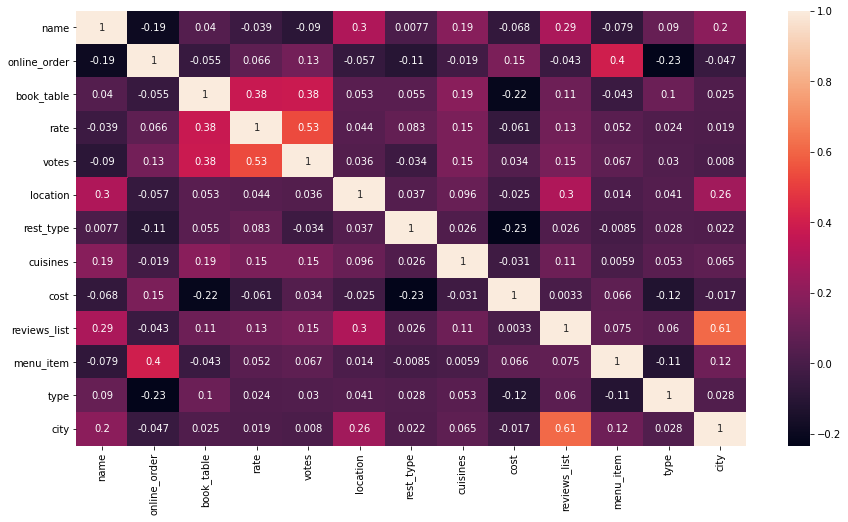

In [84]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
dataset_en.columns

### Taking X and Y


In [85]:
dataset_en.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,1,1,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,4.1,787,0,0,1,800.0,1,0,0,0
2,2,1,0,3.8,918,0,1,2,800.0,2,0,0,0
3,3,0,0,3.7,88,0,2,3,300.0,3,0,0,0
4,4,0,0,3.8,166,1,0,4,600.0,4,0,0,0


In [90]:
X = dataset_en.drop(columns = ['name', 'rate', 'reviews_list', 'type', 'city'], axis = 1)

In [91]:
X.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,0,0,0,800.0,0
1,1,0,787,0,0,1,800.0,0
2,1,0,918,0,1,2,800.0,0
3,0,0,88,0,2,3,300.0,0
4,0,0,166,1,0,4,600.0,0


In [92]:
y = dataset_en['rate']

In [93]:
y.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

### Splitting Data into train and test

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 353)

In [95]:
X_train.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
19461,1,0,204,12,35,20,500.0,0
28762,1,0,97,29,2,698,300.0,0
5945,0,1,8375,32,65,1026,2.0,0
12844,1,0,125,31,3,866,900.0,1952
45313,0,0,91,28,2,29,300.0,0


In [96]:
y_train.head()

19461    4.0
28762    3.6
5945     4.5
12844    4.1
45313    2.6
Name: rate, dtype: float64

### Data Visualization

**How many of the Resturants Delivering Online??**



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Restaurants delivering online or Not')

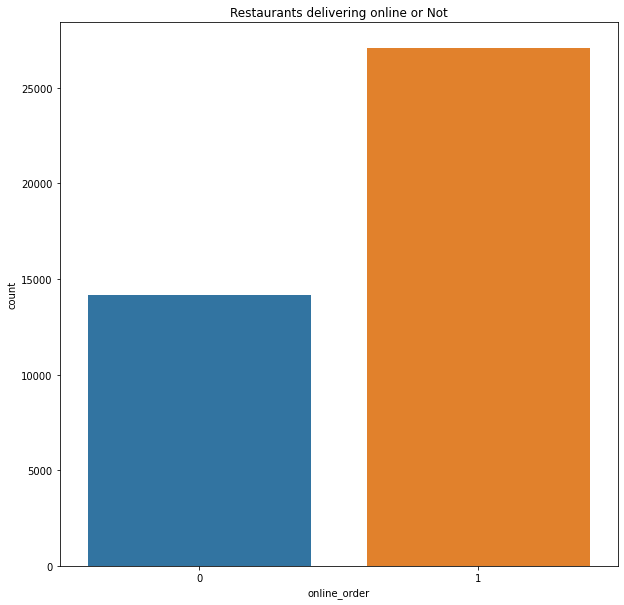

In [97]:
#Restaurants delivering Online or not
sns.countplot(dataset_en['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

**How many of the Resturants Allowing table Booking??**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Restaurants allowing table booking or not')

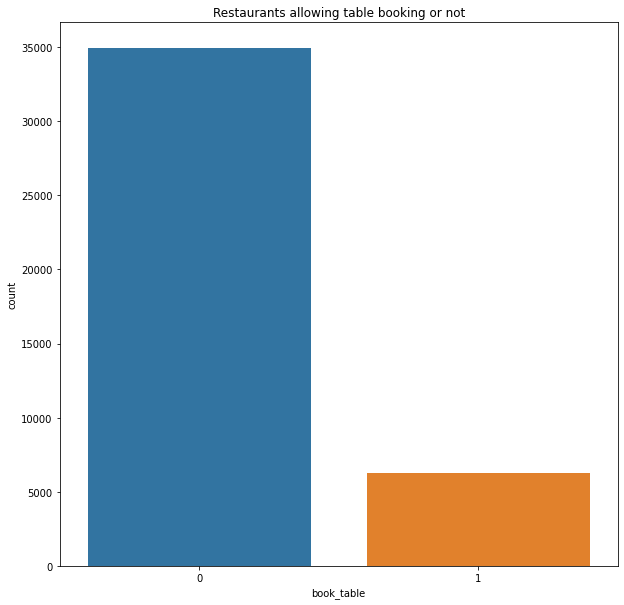

In [98]:
sns.countplot(dataset_en['book_table'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants allowing table booking or not')